### Part II | Road Lane Detection Using Hough Transform

Steps:
1. smoothing using 2d median filter
2. edge detection using canny detector
3. roi extraction
4. hough trasnform
5. post processing

Reference:
https://blog.paperspace.com/understanding-hough-transform-lane-detection/

Notes:
1.

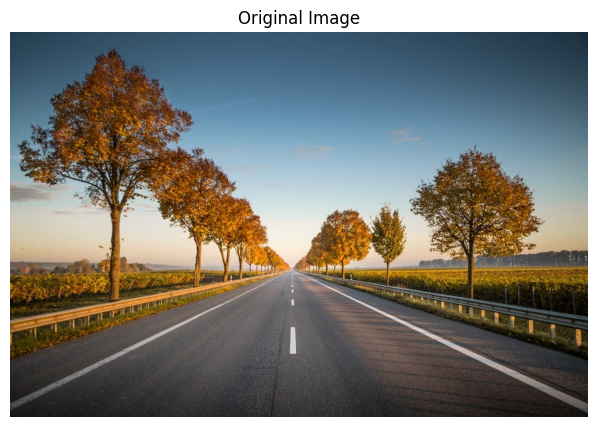

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('lane2.jpg')
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))
plt.imshow(image2)
plt.title("Original Image")
plt.axis("off")
plt.show()

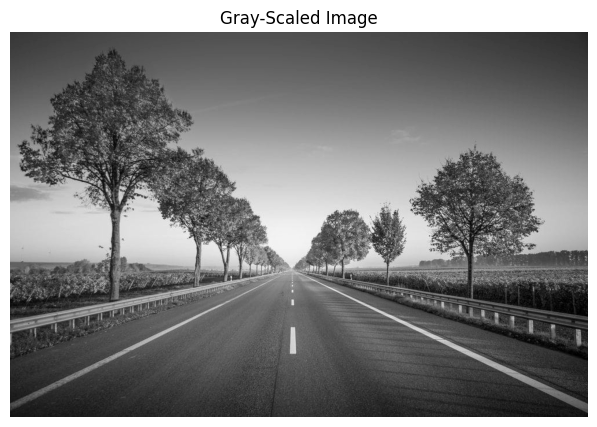

In [8]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.imshow(gray_image, cmap="gray")
plt.title("Gray-Scaled Image")
plt.axis("off")
plt.show()

In [ ]:
# # 1. Smoothing
# smoothed = cv2.medianBlur(gray_image, 3)

# plt.figure(figsize=(10, 5))
# plt.imshow(smoothed, cmap="gray")
# plt.title("Median Blur")
# plt.axis("off")
# plt.show()

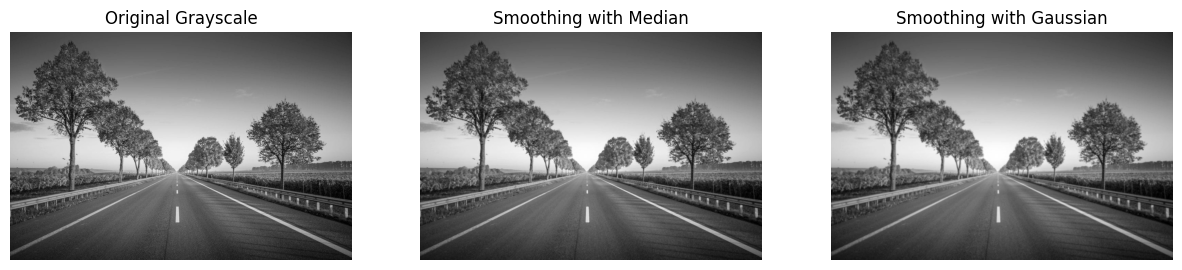

In [13]:
smoothed_median = cv2.medianBlur(gray_image, 3)
smoothed_gaussian = cv2.GaussianBlur(gray_image, (5,5), 0)


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gray_image, cmap="gray")
ax[0].set_title("Original Grayscale")
ax[0].axis("off")

ax[1].imshow(smoothed_median, cmap="gray")
ax[1].set_title("Smoothing with Median")
ax[1].axis("off")

ax[2].imshow(smoothed_gaussian, cmap="gray")
ax[2].set_title("Smoothing with Gaussian")
ax[2].axis("off")

plt.show()

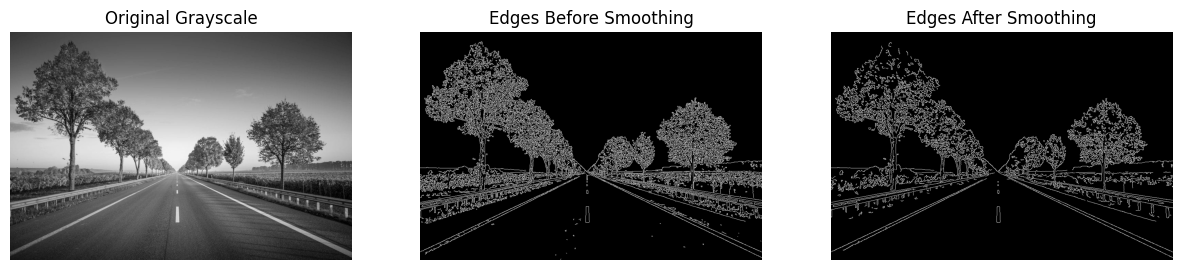

In [14]:
edges_before = cv2.Canny(gray_image, 100, 200)
edges = cv2.Canny(smoothed_median, 100, 200)

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(gray_image, cmap="gray")
ax[0].set_title("Original Grayscale")
ax[0].axis("off")

ax[1].imshow(edges_before, cmap="gray")
ax[1].set_title("Edges Before Smoothing")
ax[1].axis("off")

ax[2].imshow(edges, cmap="gray")
ax[2].set_title("Edges After Smoothing")
ax[2].axis("off")

plt.show()


In [15]:
print(edges.shape)

(667, 1000)


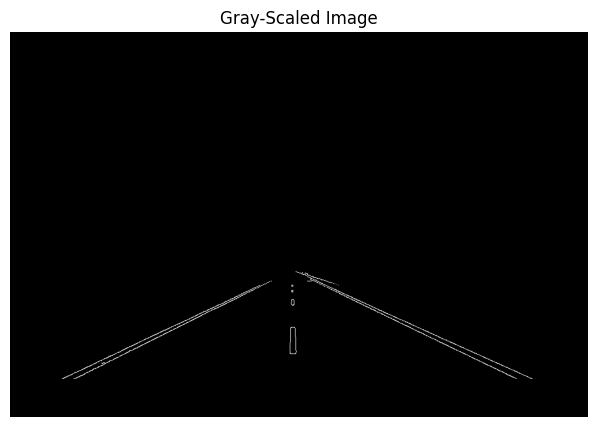

In [22]:
mask = np.zeros_like(edges)
height, width = edges.shape
polygon = np.array([[
    (0, 0.9*height), (width, 0.9*height), (width//2, 0.62*height)
]], dtype=np.int32)

cv2.fillPoly(mask, polygon, 255)
roi = cv2.bitwise_and(edges, mask)


plt.figure(figsize=(10, 5))
plt.imshow(roi, cmap="gray")
plt.title("Gray-Scaled Image")
plt.axis("off")
plt.show()

To be completed:
1. Applying Hough
2. Post processing